In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder

In [6]:
filename="Pokemon.csv"
df=pd.read_csv(filename)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df['Is_Mega'] = df['Name'].str.contains('Mega')
pseudo_legendary = ['Dragonite', 'Tyranitar', 'Salamence', 'Metagross', 'Garchomp', 
                    'Hydreigon', 'Goodra']
df['Is_Pseudo_Legendary'] = df['Name'].apply(lambda x: x in pseudo_legendary)

In [7]:
df=df.drop(['Type 1', 'Type 2',],axis=1)

In [8]:
df["Legendary"] = df["Legendary"].astype(int)

In [9]:
df=df.drop(['#', 'Name',],axis=1)

In [41]:
df.to_csv('pokemon_data.csv', index=False)

In [10]:
df.isnull().sum()

Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [12]:
print(df['Legendary'].value_counts())


Legendary
0    735
1     65
Name: count, dtype: int64


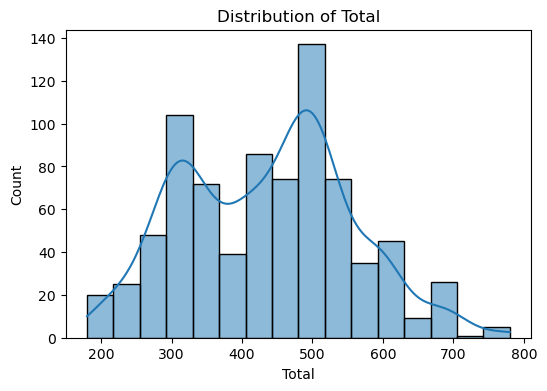

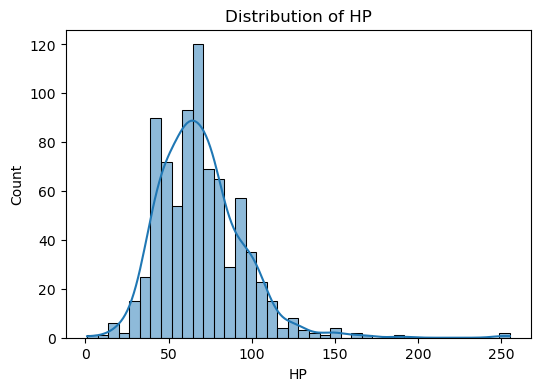

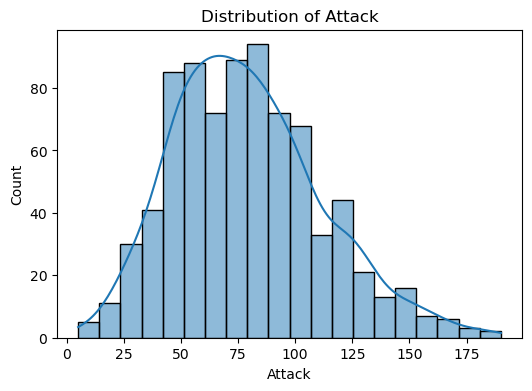

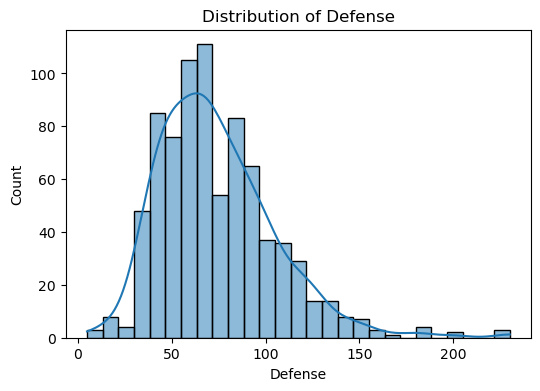

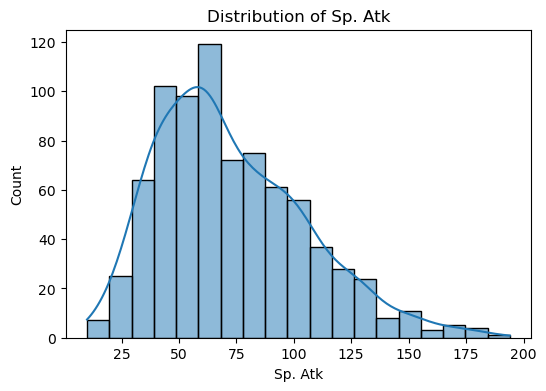

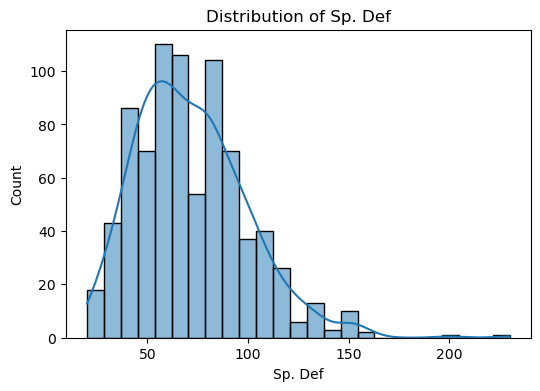

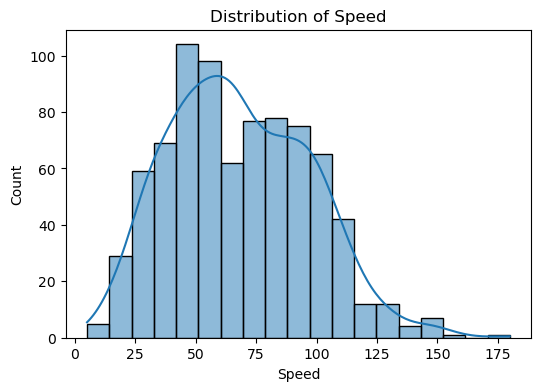

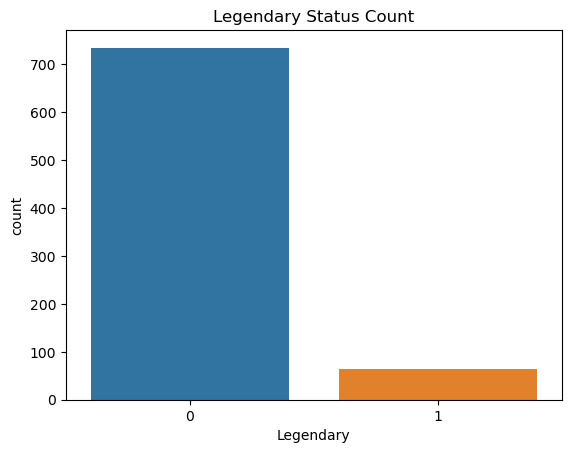

In [47]:
for col in ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

sns.countplot(x='Legendary', data=df)
plt.title('Legendary Status Count')
plt.show()


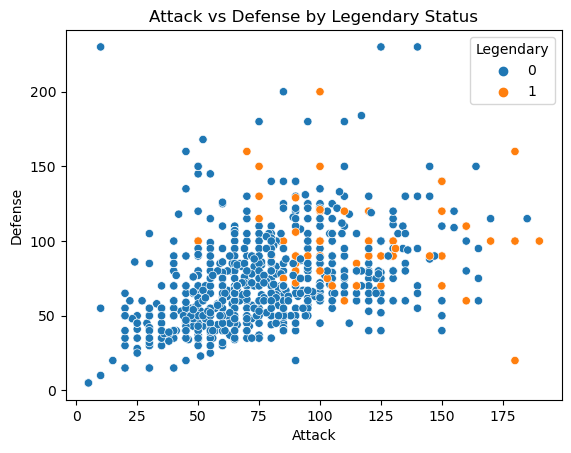

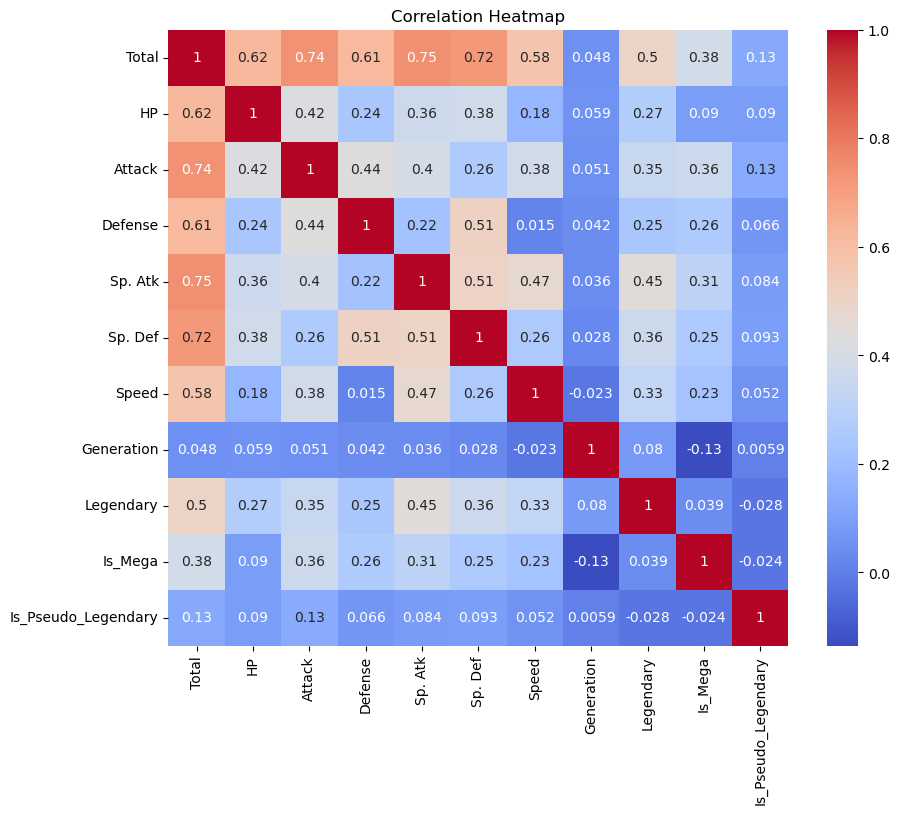

In [48]:
sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=df)
plt.title('Attack vs Defense by Legendary Status')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

c:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


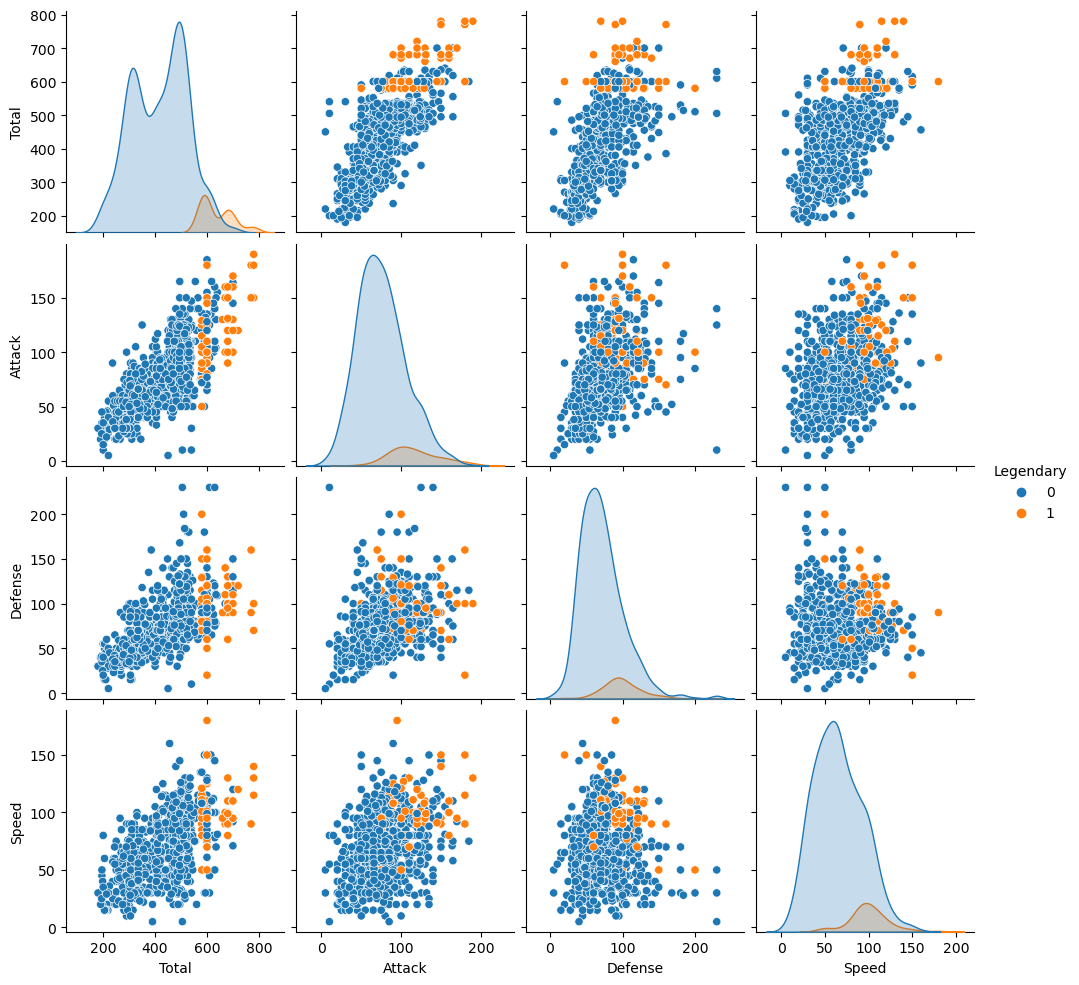

In [49]:
sns.pairplot(df, hue='Legendary', vars=['Total', 'Attack', 'Defense', 'Speed'])
plt.show()

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]
df_numeric = df_numeric.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

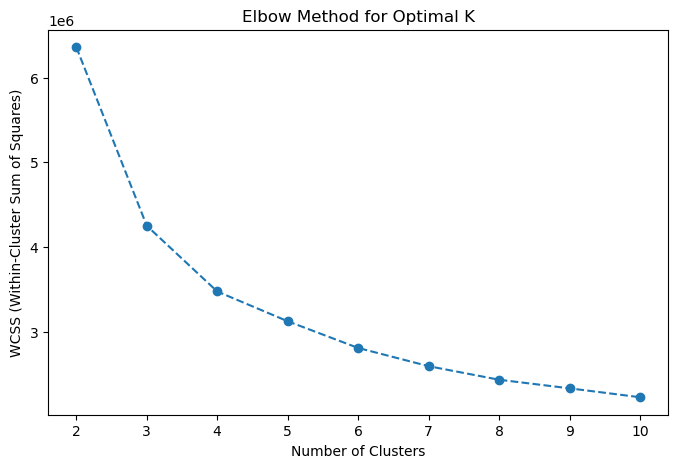

In [14]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [27]:
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
dbi_score = davies_bouldin_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Davies-Bouldin Index: {dbi_score:.4f}')

Silhouette Score: 0.2827
Davies-Bouldin Index: 1.3344


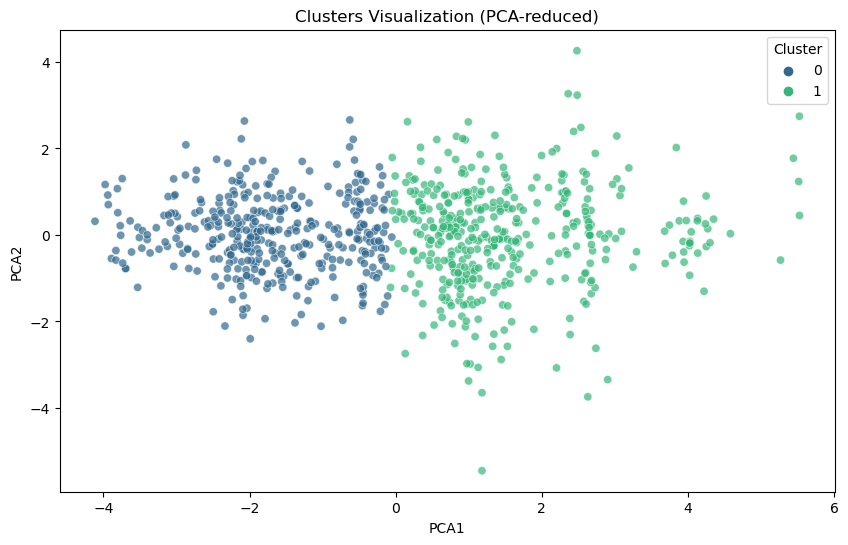

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, alpha=0.7)
plt.title('Clusters Visualization (PCA-reduced)')
plt.show()

In [81]:
display(df[['Cluster']].value_counts())

Cluster
3          285
0          251
1          137
2          127
Name: count, dtype: int64